# Employee Data City of Chicago Clustering

Dalam Notebook ini, saya akan membuat analisis tentang data dari para pekerja yang ada di Kota Chicago dengan kolom-kolom seperti berikut :

1) Name : Nama dari pekerja

2) Job Titles : Pekerjaan yang dilakukan

3) Department : Departemen pekerjaan terkait

4) Full or Part Time : Bekerja Fulltime (F) atau Parttime (P)

5) Typical Hours : Bekerja berapa jam dalam seminggu

6) Annual Salary : Gaji dalam setahun

7) Hourly Rate : Bayaran per jam


In [35]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [36]:
# Import dataset
df = pd.read_csv('current-employee-names-salaries-and-position-titles-1.csv')
df.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,$101442.00,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,$94122.00,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,$101592.00,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,$110064.00,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,$19.86


In [37]:
# Cek fitur yang ada di dataset
df.columns

Index(['Name', 'Job Titles', 'Department', 'Full or Part-Time',
       'Salary or Hourly', 'Typical Hours', 'Annual Salary', 'Hourly Rate'],
      dtype='object')

In [38]:
# Cek data missing value/null
df.isnull().sum()

Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        25161
Annual Salary         8022
Hourly Rate          25161
dtype: int64

In [39]:
def summary_table(df): #function to create an added information regarding the dataset
    summary = pd.DataFrame(dict(dataFeatures = df.columns,
                                  dataType = df.dtypes, #display datatype
                                  null = df.isna().sum(), #sum of null values
                                  null_percentage = round(df.isna().sum() / len(df) *100,2),#how many percente null values
                                  unique = df.nunique(),  #cek for number of unique values
                                  uniqueSample = [list(df[i].sample(3).drop_duplicates()) for i in df.columns] #3 random samples
                               )
                           ).reset_index(drop=True)
    summary['unique_percentage'] = round(summary['unique'] / len(df) *100,2) #convert unique to percentage values
    return summary

In [40]:
summary_table(df)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,Name,object,0,0.00,32880,"[FEAZELL, KEION , DUFFIN, KEVIN B, ZLOTOW, ...",99.09
1,Job Titles,object,0,0.00,1111,"[POLICE OFFICER, MOTOR TRUCK DRIVER, FIREFIGHT...",3.35
2,Department,object,0,0.00,35,"[OEMC, POLICE]",0.11
3,Full or Part-Time,object,0,0.00,2,[F],0.01
4,Salary or Hourly,object,0,0.00,2,"[Salary, Hourly]",0.01
5,Typical Hours,float64,25161,75.82,4,"[nan, 40.0]",0.01
6,Annual Salary,object,8022,24.18,1000,"[nan, $95484.00]",3.01
7,Hourly Rate,object,25161,75.82,167,"[$36.21, nan, $22.36]",0.50


In [41]:
df.describe()

,Typical Hours
count,8022.000000
mean,34.507604
std,9.252077
min,10.000000
25%,20.000000
50%,40.000000
75%,40.000000
max,40.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33183 entries, 0 to 33182
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               33183 non-null  object 
 1   Job Titles         33183 non-null  object 
 2   Department         33183 non-null  object 
 3   Full or Part-Time  33183 non-null  object 
 4   Salary or Hourly   33183 non-null  object 
 5   Typical Hours      8022 non-null   float64
 6   Annual Salary      25161 non-null  object 
 7   Hourly Rate        8022 non-null   object 
dtypes: float64(1), object(7)
memory usage: 2.0+ MB


In [43]:
# Menghilangkan kata $ dan mengubah menjadi float64
df['Annual Salary']=df['Annual Salary'].str.replace(r'$', '').astype('float64')

In [44]:
# Menghilangkan kata $ dan mengubah menjadi float64
df['Hourly Rate']=df['Hourly Rate'].str.replace(r'$', '').astype('float64')

In [45]:
df.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


In [46]:
# Membagi menjadi 2 berdasarkan Fulltime atau Parttime
df_part = df[df['Full or Part-Time'] == 'P']

In [47]:
# Membagi menjadi 2 berdasarkan Fulltime atau Parttime
df_full = df[df['Full or Part-Time'] == 'F']

In [48]:
df_full = df_full.reset_index()

In [49]:
df_full.drop(columns=['index'], inplace=True)

In [50]:
df_full

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABBASI, CHRISTOPHER",STAFF ASST TO THE ALDERMAN,CITY COUNCIL,F,Salary,NaN,50436.0,NaN
...,...,...,...,...,...,...,...,...
31085,"ZYLINSKA, KATARZYNA",POLICE OFFICER,POLICE,F,Salary,NaN,72510.0,NaN
31086,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,48078.0,NaN
31087,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN
31088,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN


In [51]:
summary_table(df_full)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,Name,object,0,0.00,30805,"[CONENNA, ALICIA M, STORY, IVAN B, HARRIS, ...",99.08
1,Job Titles,object,0,0.00,1089,"[POLICE OFFICER, INVESTIGATOR I - IG, POLICE O...",3.50
2,Department,object,0,0.00,35,"[POLICE, AVIATION]",0.11
3,Full or Part-Time,object,0,0.00,1,[F],0.00
4,Salary or Hourly,object,0,0.00,2,"[Salary, Hourly]",0.01
5,Typical Hours,float64,25159,80.92,4,[nan],0.01
6,Annual Salary,float64,5931,19.08,998,"[107988.0, nan]",3.21
7,Hourly Rate,float64,25159,80.92,123,[nan],0.40


df_full.drop(columns=['Typical Hours', 'Hourly Rate'], inplace=True)

In [18]:
summary_table(df_full)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,Name,object,0,0.00,30805,"[MALDONADO, OSWALDO , SIMS, GREGORY , WATKIN...",99.08
1,Job Titles,object,0,0.00,1089,"[ASST DIVISION SUPERINTENDENT, POLICE OFFICER]",3.50
2,Department,object,0,0.00,35,"[STREETS & SAN, FAMILY & SUPPORT, TRANSPORTN]",0.11
3,Full or Part-Time,object,0,0.00,1,[F],0.00
4,Salary or Hourly,object,0,0.00,2,[Salary],0.01
5,Typical Hours,float64,25159,80.92,4,"[40.0, nan]",0.01
6,Annual Salary,float64,5931,19.08,998,"[90024.0, 98052.0, 89148.0]",3.21
7,Hourly Rate,float64,25159,80.92,123,[nan],0.40


In [19]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31090 entries, 0 to 31089
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               31090 non-null  object 
 1   Job Titles         31090 non-null  object 
 2   Department         31090 non-null  object 
 3   Full or Part-Time  31090 non-null  object 
 4   Salary or Hourly   31090 non-null  object 
 5   Typical Hours      5931 non-null   float64
 6   Annual Salary      25159 non-null  float64
 7   Hourly Rate        5931 non-null   float64
dtypes: float64(3), object(5)
memory usage: 1.9+ MB


In [52]:
df_hourly = df_full[df_full['Typical Hours'] > 0].reset_index()

In [53]:
df_hourly.drop(columns=['index'], inplace=True)

In [54]:
df_part.reset_index(inplace=True)

In [55]:
df_part.drop(columns=['index'], inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [56]:
df_hourly

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,F,Hourly,40.0,NaN,46.10
1,"ABBATE, JOSEPH L",POOL MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,NaN,35.60
2,"ABDULLAH, RASHAD",ELECTRICAL MECHANIC (AUTOMOTIVE),GENERAL SERVICES,F,Hourly,40.0,NaN,46.10
3,"ABDUL-SHAKUR, TAHIR",GENERAL LABORER - DSS,STREETS & SAN,F,Hourly,40.0,NaN,21.43
4,"ABERCROMBIE, TIMOTHY",MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,NaN,35.60
...,...,...,...,...,...,...,...,...
5926,"ZURAWSKI, JEFFREY",FRM OF MACHINISTS - AUTOMOTIVE,GENERAL SERVICES,F,Hourly,40.0,NaN,48.85
5927,"ZUREK, FRANCIS",ELECTRICAL MECHANIC,OEMC,F,Hourly,40.0,NaN,46.10
5928,"ZWARYCZ, THOMAS J",POOL MOTOR TRUCK DRIVER,WATER MGMNT,F,Hourly,40.0,NaN,35.60
5929,"ZYGADLO, JOHN P",MACHINIST (AUTOMOTIVE),GENERAL SERVICES,F,Hourly,40.0,NaN,46.35


In [57]:
df_part

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86
1,"ABBOTT, BETTY L",FOSTER GRANDPARENT,FAMILY & SUPPORT,P,Hourly,20.0,NaN,2.65
2,"ABDULLAH, LAKENYA N",CROSSING GUARD,OEMC,P,Hourly,20.0,NaN,17.68
3,"ABIOYE, ADEWOLE A",LIBRARY ASSOCIATE - HOURLY,PUBLIC LIBRARY,P,Hourly,20.0,NaN,25.10
4,"ACHA, SHARAZAN MARLENE",POOL MOTOR TRUCK DRIVER,STREETS & SAN,P,Hourly,10.0,NaN,28.48
...,...,...,...,...,...,...,...,...
2088,"ZHANG, CONNIE B",LAW CLERK,BUSINESS AFFAIRS,P,Hourly,20.0,NaN,14.23
2089,"ZHEN, CHRISTINE",LIBRARY CLERK - HOURLY,PUBLIC LIBRARY,P,Hourly,20.0,NaN,16.17
2090,"ZIELINSKI, KAREN L",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86
2091,"ZIELINSKI, TECLA",CROSSING GUARD,OEMC,P,Hourly,20.0,NaN,22.36


In [58]:
df_hourly = pd.concat([df_part, df_hourly], axis=0)

In [59]:
summary_table(df_hourly)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,Name,object,0,0.00,7995,"[ROBLEDO, JESSE , DURAN JR, JESUS Y, STARR, ...",99.64
1,Job Titles,object,0,0.00,145,"[MOTOR TRUCK DRIVER, LINEMAN, WATCHMAN]",1.81
2,Department,object,0,0.00,22,"[PUBLIC LIBRARY, WATER MGMNT, STREETS & SAN]",0.27
3,Full or Part-Time,object,0,0.00,2,"[P, F]",0.02
4,Salary or Hourly,object,0,0.00,2,[Hourly],0.02
5,Typical Hours,float64,2,0.02,4,[40.0],0.05
6,Annual Salary,float64,8022,99.98,2,[nan],0.02
7,Hourly Rate,float64,2,0.02,167,"[19.86, 25.1, 36.21]",2.08


In [28]:
df_hourly.drop(columns=['Annual Salary'], inplace=True)

In [29]:
df_hourly.dropna(inplace=True)

In [30]:
summary_table(df_hourly)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,Name,object,0,0.0,7993,"[ROBINSON, VIRGIL E, LYNN, DENNIS R, THOMPSO...",99.64
1,Job Titles,object,0,0.0,145,"[MOTOR TRUCK DRIVER, CONSTRUCTION LABORER, LAB...",1.81
2,Department,object,0,0.0,22,"[WATER MGMNT, OEMC]",0.27
3,Full or Part-Time,object,0,0.0,2,[F],0.02
4,Salary or Hourly,object,0,0.0,1,[Hourly],0.01
5,Typical Hours,float64,0,0.0,4,"[20.0, 40.0]",0.05
6,Hourly Rate,float64,0,0.0,167,"[35.6, 48.25, 48.9]",2.08


In [60]:
df_annual = df_hourly[df_hourly['Annual Salary'] > 0]

In [61]:
summary_table(df_full)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,Name,object,0,0.00,30805,"[WIECZOREK, PETER A, NEITA-SCOTT, BRANDON , ...",99.08
1,Job Titles,object,0,0.00,1089,"[GENERAL LABORER - DSS, OPERATING ENGINEER-GRO...",3.50
2,Department,object,0,0.00,35,"[POLICE, ANIMAL CONTRL]",0.11
3,Full or Part-Time,object,0,0.00,1,[F],0.00
4,Salary or Hourly,object,0,0.00,2,"[Salary, Hourly]",0.01
5,Typical Hours,float64,25159,80.92,4,[nan],0.01
6,Annual Salary,float64,5931,19.08,998,"[nan, 84420.0, 87006.0]",3.21
7,Hourly Rate,float64,25159,80.92,123,[nan],0.40


In [62]:
df_annual = pd.concat([df_full, df_annual], axis=0)

In [63]:
df_annual

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABBASI, CHRISTOPHER",STAFF ASST TO THE ALDERMAN,CITY COUNCIL,F,Salary,NaN,50436.0,NaN
...,...,...,...,...,...,...,...,...
31087,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN
31088,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN
31089,"ZYSKOWSKI, DARIUSZ",CHIEF DATA BASE ANALYST,DoIT,F,Salary,NaN,115932.0,NaN
149,"BLONSKI, KATHERINE E",ALDERMANIC AIDE,CITY COUNCIL,P,Salary,NaN,7200.0,NaN


In [64]:
summary_table(df_annual)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,Name,object,0,0.00,30807,"[BRAUN, JAMES F, SOWA, ROBERT P, TROTTA, CA...",99.08
1,Job Titles,object,0,0.00,1089,"[EVIDENCE SPECIALIST - COPA, LIEUTENANT-EMT, D...",3.50
2,Department,object,0,0.00,35,"[AVIATION, FIRE, POLICE]",0.11
3,Full or Part-Time,object,0,0.00,2,[F],0.01
4,Salary or Hourly,object,0,0.00,2,[Salary],0.01
5,Typical Hours,float64,25161,80.92,4,[nan],0.01
6,Annual Salary,float64,5931,19.08,1000,"[84420.0, 93354.0, 92274.0]",3.22
7,Hourly Rate,float64,25161,80.92,123,"[nan, 35.6]",0.40


In [65]:
df_annual.drop(columns=['Typical Hours', 'Hourly Rate'], inplace=True)

In [66]:
summary_table(df_annual)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,Name,object,0,0.00,30807,"[URIAN, TORIBIO , MATTHIS, MARY J, LUEVANO, ...",99.08
1,Job Titles,object,0,0.00,1089,"[POLICE ADMINISTRATIVE CLERK, FIREFIGHTER-EMT ...",3.50
2,Department,object,0,0.00,35,"[FIRE, LAW, CULTURAL AFFAIRS]",0.11
3,Full or Part-Time,object,0,0.00,2,[F],0.01
4,Salary or Hourly,object,0,0.00,2,"[Hourly, Salary]",0.01
5,Annual Salary,float64,5931,19.08,1000,"[87006.0, nan, 93354.0]",3.22


In [67]:
df_annual.dropna(inplace=True)

In [68]:
df_annual

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Annual Salary
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,101442.0
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,94122.0
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,101592.0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,110064.0
4,"ABBASI, CHRISTOPHER",STAFF ASST TO THE ALDERMAN,CITY COUNCIL,F,Salary,50436.0
...,...,...,...,...,...,...
31087,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,90024.0
31088,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,93354.0
31089,"ZYSKOWSKI, DARIUSZ",CHIEF DATA BASE ANALYST,DoIT,F,Salary,115932.0
149,"BLONSKI, KATHERINE E",ALDERMANIC AIDE,CITY COUNCIL,P,Salary,7200.0


In [69]:
df_hourly

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86
1,"ABBOTT, BETTY L",FOSTER GRANDPARENT,FAMILY & SUPPORT,P,Hourly,20.0,NaN,2.65
2,"ABDULLAH, LAKENYA N",CROSSING GUARD,OEMC,P,Hourly,20.0,NaN,17.68
3,"ABIOYE, ADEWOLE A",LIBRARY ASSOCIATE - HOURLY,PUBLIC LIBRARY,P,Hourly,20.0,NaN,25.10
4,"ACHA, SHARAZAN MARLENE",POOL MOTOR TRUCK DRIVER,STREETS & SAN,P,Hourly,10.0,NaN,28.48
...,...,...,...,...,...,...,...,...
5926,"ZURAWSKI, JEFFREY",FRM OF MACHINISTS - AUTOMOTIVE,GENERAL SERVICES,F,Hourly,40.0,NaN,48.85
5927,"ZUREK, FRANCIS",ELECTRICAL MECHANIC,OEMC,F,Hourly,40.0,NaN,46.10
5928,"ZWARYCZ, THOMAS J",POOL MOTOR TRUCK DRIVER,WATER MGMNT,F,Hourly,40.0,NaN,35.60
5929,"ZYGADLO, JOHN P",MACHINIST (AUTOMOTIVE),GENERAL SERVICES,F,Hourly,40.0,NaN,46.35


In [78]:
df_hourly['Annual Salary'] = df_hourly['Typical Hours'] * df_hourly['Hourly Rate'] * 4 * 52

In [79]:
df_hourly

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,82617.6,19.86
1,"ABBOTT, BETTY L",FOSTER GRANDPARENT,FAMILY & SUPPORT,P,Hourly,20.0,11024.0,2.65
2,"ABDULLAH, LAKENYA N",CROSSING GUARD,OEMC,P,Hourly,20.0,73548.8,17.68
3,"ABIOYE, ADEWOLE A",LIBRARY ASSOCIATE - HOURLY,PUBLIC LIBRARY,P,Hourly,20.0,104416.0,25.10
4,"ACHA, SHARAZAN MARLENE",POOL MOTOR TRUCK DRIVER,STREETS & SAN,P,Hourly,10.0,59238.4,28.48
...,...,...,...,...,...,...,...,...
5926,"ZURAWSKI, JEFFREY",FRM OF MACHINISTS - AUTOMOTIVE,GENERAL SERVICES,F,Hourly,40.0,406432.0,48.85
5927,"ZUREK, FRANCIS",ELECTRICAL MECHANIC,OEMC,F,Hourly,40.0,383552.0,46.10
5928,"ZWARYCZ, THOMAS J",POOL MOTOR TRUCK DRIVER,WATER MGMNT,F,Hourly,40.0,296192.0,35.60
5929,"ZYGADLO, JOHN P",MACHINIST (AUTOMOTIVE),GENERAL SERVICES,F,Hourly,40.0,385632.0,46.35


In [119]:
# Menggabungkan df_annual (dibayar tahunan) dan df_hourly (dibayar perjam)
df_ok = pd.concat([df_annual, df_hourly], axis=0)

In [81]:
df_ok

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Annual Salary,Typical Hours,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,101442.0,NaN,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,94122.0,NaN,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,101592.0,NaN,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,110064.0,NaN,NaN
4,"ABBASI, CHRISTOPHER",STAFF ASST TO THE ALDERMAN,CITY COUNCIL,F,Salary,50436.0,NaN,NaN
...,...,...,...,...,...,...,...,...
5926,"ZURAWSKI, JEFFREY",FRM OF MACHINISTS - AUTOMOTIVE,GENERAL SERVICES,F,Hourly,406432.0,40.0,48.85
5927,"ZUREK, FRANCIS",ELECTRICAL MECHANIC,OEMC,F,Hourly,383552.0,40.0,46.10
5928,"ZWARYCZ, THOMAS J",POOL MOTOR TRUCK DRIVER,WATER MGMNT,F,Hourly,296192.0,40.0,35.60
5929,"ZYGADLO, JOHN P",MACHINIST (AUTOMOTIVE),GENERAL SERVICES,F,Hourly,385632.0,40.0,46.35


In [123]:
# Drop kolom Typical Hours dan Hourly Rate
df_ok.drop(columns=['Typical Hours', 'Hourly Rate'], inplace=True)

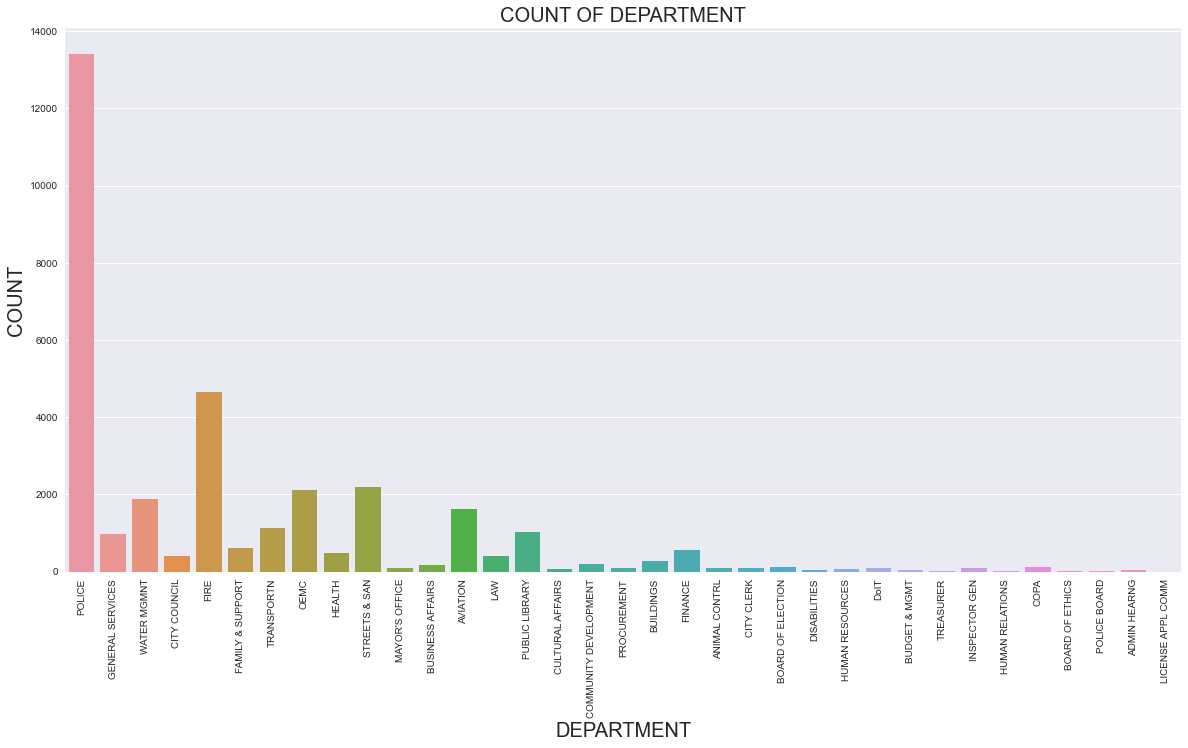

In [120]:
# Jumlah pekerja berdasarkan Departemen
plt.figure(figsize=(20,10))
sns.countplot(x=df_ok["Department"])
plt.title("COUNT OF DEPARTMENT",fontsize=20)
plt.xlabel("DEPARTMENT",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [124]:
summary_table(df_ok)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,Name,object,0,0.0,7993,"[HILL, ANTHONY , COLEMAN, DERRYL L, MC CURDY...",99.64
1,Job Titles,object,0,0.0,145,"[TRAFFIC CONTROL AIDE-HOURLY, MACHINIST (AUTOM...",1.81
2,Department,object,0,0.0,22,"[AVIATION, FAMILY & SUPPORT, STREETS & SAN]",0.27
3,Full or Part-Time,object,0,0.0,2,"[F, P]",0.02
4,Salary or Hourly,object,0,0.0,1,[Hourly],0.01
5,Annual Salary,float64,0,0.0,185,"[334464.0, 296192.0]",2.31


In [125]:
# Drop data yang masih null
df_ok.dropna(inplace=True)

In [126]:
# Encoding kolom Full or Part time dengan replace
df_ok['Full or Part-Time'].replace(['P', 'F'],[0,1],inplace=True)

In [127]:
df_ok.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Annual Salary
0,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,0,Hourly,82617.6
1,"ABBOTT, BETTY L",FOSTER GRANDPARENT,FAMILY & SUPPORT,0,Hourly,11024.0
2,"ABDULLAH, LAKENYA N",CROSSING GUARD,OEMC,0,Hourly,73548.8
3,"ABIOYE, ADEWOLE A",LIBRARY ASSOCIATE - HOURLY,PUBLIC LIBRARY,0,Hourly,104416.0
4,"ACHA, SHARAZAN MARLENE",POOL MOTOR TRUCK DRIVER,STREETS & SAN,0,Hourly,59238.4


In [128]:
df_ok['Salary or Hourly'].unique()

array(['Hourly'], dtype=object)

In [129]:
# Encoding kolom Salary or Hourly dengan replace
df_ok['Salary or Hourly'].replace(['Salary', 'Hourly'],[0,1],inplace=True)

In [89]:
# Drop kolom Name and Job Titles
df_ok.drop(columns=['Name', 'Job Titles'], inplace=True)

In [90]:
# mengatasi Dummy Variable Trap
df_ok = pd.get_dummies(df_ok, columns=['Department'], drop_first = True)

In [91]:
df_ok

,Full or Part-Time,Salary or Hourly,Annual Salary,Department_ANIMAL CONTRL,Department_AVIATION,Department_BOARD OF ELECTION,Department_BOARD OF ETHICS,Department_BUDGET & MGMT,Department_BUILDINGS,Department_BUSINESS AFFAIRS,...,Department_MAYOR'S OFFICE,Department_OEMC,Department_POLICE,Department_POLICE BOARD,Department_PROCUREMENT,Department_PUBLIC LIBRARY,Department_STREETS & SAN,Department_TRANSPORTN,Department_TREASURER,Department_WATER MGMNT
0,1,0,101442.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,94122.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,101592.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,110064.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,50436.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5926,1,1,406432.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5927,1,1,383552.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5928,1,1,296192.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5929,1,1,385632.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


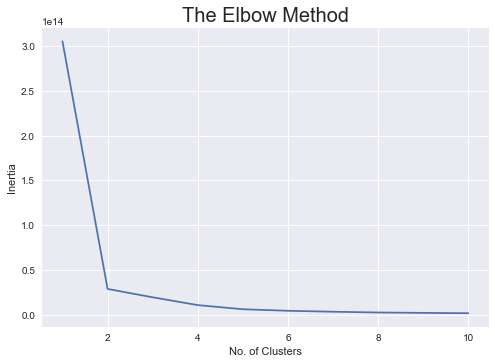

In [92]:
# Mencari nilai KMeans
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 42)
    km.fit(df_ok)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')

plt.show()

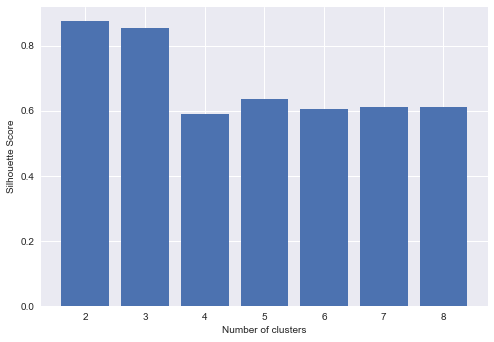

In [93]:
# silhouette coefficient
# standard: -1 s/d 1 => seberapa bagus model mendefinisikan cluster
from sklearn import metrics
silhouette_scores = [] 

for n_cluster in range(2, 9):
    silhouette_scores.append( 
        metrics.silhouette_score(df_ok, 
                                 KMeans(n_clusters = n_cluster).fit_predict(df_ok))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7, 8] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [95]:
# menggunakan 2 cluster
km = KMeans(n_clusters = 2, random_state = 42)
cluster = km.fit_predict(df_ok)

In [96]:
# mengetahui posisi centroids
km.cluster_centers_

array([[ 9.24874372e-01,  9.69849246e-02,  8.69760904e+04,
         2.90739411e-03,  2.46590093e-02,  3.84063173e-03,
         2.87150036e-04,  1.65111271e-03,  9.65541996e-03,
         6.13783202e-03,  3.01507538e-03,  1.47523331e-02,
         7.39411342e-03,  4.16367552e-03,  2.33309404e-03,
         1.00502513e-03,  3.55348169e-03,  2.20746590e-02,
         1.85929648e-02,  1.66511127e-01,  1.23833453e-02,
         1.74084709e-02,  5.74300072e-04,  2.83560660e-03,
         3.12275664e-03,  1.45728643e-02,  3.58937545e-05,
         3.01507538e-03,  7.38693467e-02,  4.81442929e-01,
         7.17875090e-05,  3.23043790e-03,  3.60373295e-02,
         2.68126346e-02,  1.48959081e-02,  7.89662599e-04,
         1.49676956e-02],
       [ 1.00000000e+00,  9.99436408e-01,  3.35601840e+05,
        -2.11636264e-16,  1.76967875e-01, -1.14925430e-16,
        -2.87313576e-18, -1.87350135e-16,  1.35308431e-16,
        -2.09034179e-16, -1.44849410e-16,  1.97758476e-16,
         1.87863986e-04, -2.45

In [97]:
# memasukkan kolom cluster ke dataframe
df_ok['cluster']=cluster

In [98]:
df_ok

,Full or Part-Time,Salary or Hourly,Annual Salary,Department_ANIMAL CONTRL,Department_AVIATION,Department_BOARD OF ELECTION,Department_BOARD OF ETHICS,Department_BUDGET & MGMT,Department_BUILDINGS,Department_BUSINESS AFFAIRS,...,Department_OEMC,Department_POLICE,Department_POLICE BOARD,Department_PROCUREMENT,Department_PUBLIC LIBRARY,Department_STREETS & SAN,Department_TRANSPORTN,Department_TREASURER,Department_WATER MGMNT,cluster
0,1,0,101442.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,94122.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,101592.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,110064.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,50436.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5926,1,1,406432.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5927,1,1,383552.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5928,1,1,296192.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
5929,1,1,385632.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [99]:
df_ok.columns

Index(['Full or Part-Time', 'Salary or Hourly', 'Annual Salary',
       'Department_ANIMAL CONTRL', 'Department_AVIATION',
       'Department_BOARD OF ELECTION', 'Department_BOARD OF ETHICS',
       'Department_BUDGET & MGMT', 'Department_BUILDINGS',
       'Department_BUSINESS AFFAIRS', 'Department_CITY CLERK',
       'Department_CITY COUNCIL', 'Department_COMMUNITY DEVELOPMENT',
       'Department_COPA', 'Department_CULTURAL AFFAIRS',
       'Department_DISABILITIES', 'Department_DoIT',
       'Department_FAMILY & SUPPORT', 'Department_FINANCE', 'Department_FIRE',
       'Department_GENERAL SERVICES', 'Department_HEALTH',
       'Department_HUMAN RELATIONS', 'Department_HUMAN RESOURCES',
       'Department_INSPECTOR GEN', 'Department_LAW',
       'Department_LICENSE APPL COMM', 'Department_MAYOR'S OFFICE',
       'Department_OEMC', 'Department_POLICE', 'Department_POLICE BOARD',
       'Department_PROCUREMENT', 'Department_PUBLIC LIBRARY',
       'Department_STREETS & SAN', 'Departme

In [100]:
df_ok[df_ok['Department_ANIMAL CONTRL'] > 0]

,Full or Part-Time,Salary or Hourly,Annual Salary,Department_ANIMAL CONTRL,Department_AVIATION,Department_BOARD OF ELECTION,Department_BOARD OF ETHICS,Department_BUDGET & MGMT,Department_BUILDINGS,Department_BUSINESS AFFAIRS,...,Department_OEMC,Department_POLICE,Department_POLICE BOARD,Department_PROCUREMENT,Department_PUBLIC LIBRARY,Department_STREETS & SAN,Department_TRANSPORTN,Department_TREASURER,Department_WATER MGMNT,cluster
206,1,0,70092.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217,1,0,70644.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
467,1,0,70644.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
477,1,0,64392.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1158,1,0,70644.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,0,1,95180.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1669,0,1,108617.6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1775,0,1,95180.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1785,0,1,95180.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'K Means Clustering (K=2)')

<Figure size 1080x576 with 0 Axes>

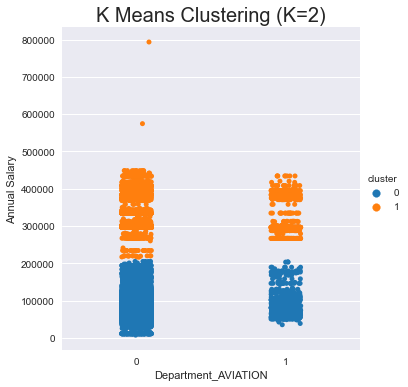

In [101]:
plt.figure(figsize=(15,8))
sns.catplot(data=df_ok, x='Department_AVIATION',y='Annual Salary', hue='cluster', palette='tab10')
plt.title('K Means Clustering (K=2)', fontsize = 20)

Text(0.5, 1.0, 'K Means Clustering (K=2)')

<Figure size 1080x576 with 0 Axes>

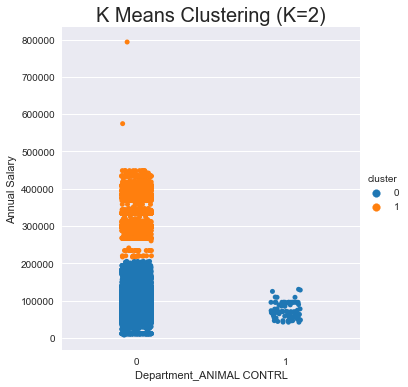

In [103]:
plt.figure(figsize=(15,8))
sns.catplot(data=df_ok, x='Department_ANIMAL CONTRL',y='Annual Salary', hue='cluster', palette='tab10')
plt.title('K Means Clustering (K=2)', fontsize = 20)

Text(0.5, 1.0, 'K Means Clustering (K=2)')

<Figure size 1080x576 with 0 Axes>

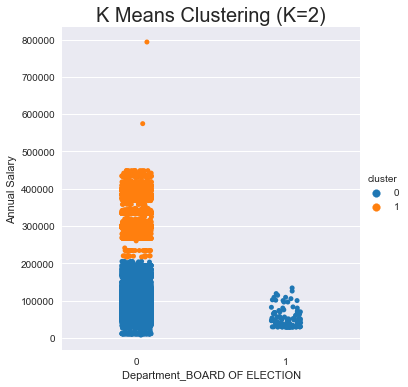

In [104]:
plt.figure(figsize=(15,8))
sns.catplot(data=df_ok, x='Department_BOARD OF ELECTION',y='Annual Salary', hue='cluster', palette='tab10')
plt.title('K Means Clustering (K=2)', fontsize = 20)

Text(0.5, 1.0, 'K Means Clustering (K=2)')

<Figure size 1080x576 with 0 Axes>

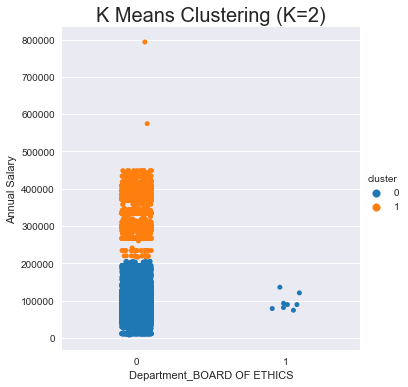

In [105]:
plt.figure(figsize=(15,8))
sns.catplot(data=df_ok, x='Department_BOARD OF ETHICS',y='Annual Salary', hue='cluster', palette='tab10')
plt.title('K Means Clustering (K=2)', fontsize = 20)

Text(0.5, 1.0, 'K Means Clustering (K=2)')

<Figure size 1080x576 with 0 Axes>

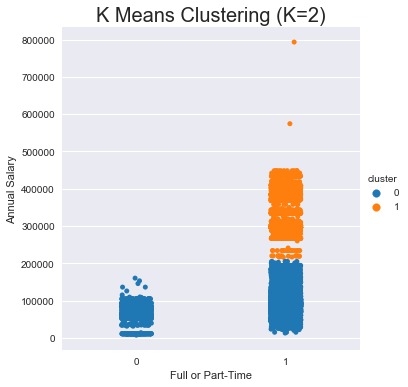

In [107]:
plt.figure(figsize=(15,8))
sns.catplot(data=df_ok, x='Full or Part-Time',y='Annual Salary', hue='cluster', palette='tab10')
plt.title('K Means Clustering (K=2)', fontsize = 20)

In [108]:
df_ok

,Full or Part-Time,Salary or Hourly,Annual Salary,Department_ANIMAL CONTRL,Department_AVIATION,Department_BOARD OF ELECTION,Department_BOARD OF ETHICS,Department_BUDGET & MGMT,Department_BUILDINGS,Department_BUSINESS AFFAIRS,...,Department_OEMC,Department_POLICE,Department_POLICE BOARD,Department_PROCUREMENT,Department_PUBLIC LIBRARY,Department_STREETS & SAN,Department_TRANSPORTN,Department_TREASURER,Department_WATER MGMNT,cluster
0,1,0,101442.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,94122.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,101592.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,110064.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,50436.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5926,1,1,406432.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5927,1,1,383552.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5928,1,1,296192.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
5929,1,1,385632.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [109]:
df_ok['Name'] = df['Name']

In [110]:
cls_0 = df_ok[df_ok.cluster == 0]
cls_0.describe()
# salary : 7200 - 205000

,Full or Part-Time,Salary or Hourly,Annual Salary,Department_ANIMAL CONTRL,Department_AVIATION,Department_BOARD OF ELECTION,Department_BOARD OF ETHICS,Department_BUDGET & MGMT,Department_BUILDINGS,Department_BUSINESS AFFAIRS,...,Department_OEMC,Department_POLICE,Department_POLICE BOARD,Department_PROCUREMENT,Department_PUBLIC LIBRARY,Department_STREETS & SAN,Department_TRANSPORTN,Department_TREASURER,Department_WATER MGMNT,cluster
count,27860.000000,27860.000000,27860.000000,27860.000000,27860.000000,27860.000000,27860.000000,27860.000000,27860.000000,27860.000000,...,27860.000000,27860.000000,27860.000000,27860.000000,27860.000000,27860.000000,27860.000000,27860.00000,27860.000000,27860.0
mean,0.924874,0.096985,86976.090385,0.002907,0.024659,0.003841,0.000287,0.001651,0.009655,0.006138,...,0.073869,0.481443,0.000072,0.003230,0.036037,0.026813,0.014896,0.00079,0.014968,0.0
std,0.263599,0.295943,24987.702668,0.053843,0.155086,0.061855,0.016943,0.040601,0.097788,0.078105,...,0.261563,0.499664,0.008473,0.056746,0.186386,0.161538,0.121139,0.02809,0.121426,0.0
min,0.000000,0.000000,7200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0
25%,1.000000,0.000000,73440.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0
50%,1.000000,0.000000,89148.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0
75%,1.000000,0.000000,96060.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0
max,1.000000,1.000000,204921.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.0


In [111]:
cls_1 = df_ok[df_ok.cluster == 1]
cls_1.describe()
# salary : 216210 - 793520

,Full or Part-Time,Salary or Hourly,Annual Salary,Department_ANIMAL CONTRL,Department_AVIATION,Department_BOARD OF ELECTION,Department_BOARD OF ETHICS,Department_BUDGET & MGMT,Department_BUILDINGS,Department_BUSINESS AFFAIRS,...,Department_OEMC,Department_POLICE,Department_POLICE BOARD,Department_PROCUREMENT,Department_PUBLIC LIBRARY,Department_STREETS & SAN,Department_TRANSPORTN,Department_TREASURER,Department_WATER MGMNT,cluster
count,5323.0,5323.000000,5323.000000,5323.0,5323.000000,5323.0,5323.0,5323.0,5323.0,5323.0,...,5323.000000,5323.000000,5323.0,5323.000000,5323.000000,5323.000000,5323.000000,5323.0,5323.000000,5323.0
mean,1.0,0.999436,335601.839639,0.0,0.176968,0.0,0.0,0.0,0.0,0.0,...,0.008266,0.000188,0.0,0.000376,0.002067,0.272591,0.136201,0.0,0.274657,1.0
std,0.0,0.023736,46487.016594,0.0,0.381677,0.0,0.0,0.0,0.0,0.0,...,0.090550,0.013706,0.0,0.019382,0.045416,0.445334,0.343035,0.0,0.446383,0.0
min,1.0,0.000000,216210.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0
25%,1.0,1.000000,296192.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0
50%,1.0,1.000000,334464.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0
75%,1.0,1.000000,383552.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.0
max,1.0,1.000000,793520.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.0


In [112]:
df_ok['Job Titles'] = df['Job Titles']

In [113]:
cluster_0 = df_ok[df_ok.cluster == 0].Name.values
cluster_0 = pd.DataFrame(cluster_0)
cluster_0

,0
0,"AARON, JEFFERY M"
1,"AARON, KARINA"
2,"AARON, KIMBERLEI R"
3,"ABAD JR, VICENTE M"
4,"ABASCAL, REECE E"
...,...
27855,"COUCH, JAMES R"
27856,"COVELLO, FRANK P"
27857,"COVINGTON, RAMON C"
27858,"COX, TEARRA M"


In [114]:
df_ok[df_ok.cluster == 0].Name.count()

27860

In [115]:
cluster_1 = df_ok[df_ok.cluster == 1].Name.values
cluster_1 = pd.DataFrame(cluster_1)
cluster_1

,0
0,"DRABIK, RICHARD E"
1,"DURBIN, JASON R"
2,"HUFF, ROGER W"
3,"AARON, JEFFERY M"
4,"AARON, KARINA"
...,...
5318,"COYLE, MATTHEW T"
5319,"COYLE, RICHARD J"
5320,"COYNE, JOHN A"
5321,"COYNE, PATRICK J"


In [116]:
df['cluster'] = cluster
df.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate,cluster
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN,0
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN,0
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN,0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN,0
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86,0


In [117]:
summary_table(df)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,Name,object,0,0.00,32880,"[ROBERSON, JACQUELINE , VITELLARO, MICHAEL A...",99.09
1,Job Titles,object,0,0.00,1111,"[POLICE OFFICER, DETENTION AIDE, LIEUTENANT-EMT]",3.35
2,Department,object,0,0.00,35,[POLICE],0.11
3,Full or Part-Time,object,0,0.00,2,[F],0.01
4,Salary or Hourly,object,0,0.00,2,"[Hourly, Salary]",0.01
5,Typical Hours,float64,25161,75.82,4,"[nan, 40.0]",0.01
6,Annual Salary,float64,8022,24.18,1000,"[nan, 97056.0, 80868.0]",3.01
7,Hourly Rate,float64,25161,75.82,167,"[15.94, nan]",0.50
8,cluster,int32,0,0.00,2,[0],0.01
